In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

means_data = pd.read_csv("Data/mean_matrix.csv")

wages = means_data[means_data["alder"] <= 61]["hourly_salary_Mean"].to_numpy()
hours = means_data[means_data["alder"] <= 61]["yearly_hours_Mean"].to_numpy() / 1924


In [67]:
def sum_hours(t, k0, hours, delta):
    total = 0
    for i in range(0, t):  # sum from 1 to t-1
        total += (1 - delta) ** (i - 1) * hours[t - i]  # Corrected index
    return total

def objective_function(params, wages, hours):
    k0, beta1, beta2, delta = params
    total_error = 0
    for t in range(len(wages)):
        error = (
            np.log(wages[t])
            - beta1 * (1 - delta) ** t * k0
            - beta1 * (sum_hours(t, k0, hours, delta))
            - beta2 * t**2
        )
        total_error += error ** 2
    return total_error

def random_initial_guess(bounds):
    return [np.random.uniform(low, high) for low, high in bounds]

def run_optimization_multiple_times(wages, hours, bounds, num_runs=10):
    results_list = []
    for _ in range(num_runs):
        initial_guess = random_initial_guess(bounds)
        
        result = minimize(
            objective_function,
            x0=initial_guess,
            args=(wages, hours),
            method="nelder-mead",
            bounds=bounds,
            tol=1e-12,
            options={"maxiter": 10000, "disp": False}
        )

        estimated_params = result.x
        k0_est, beta1_est, beta2_est, delta_est = estimated_params
        sse = result.fun

        results_list.append({
            "k0": k0_est,
            "beta1": beta1_est,
            "beta2": beta2_est,
            "delta": delta_est,
            "SSE": sse
        })
    
    results_df = pd.DataFrame(results_list)

    results_df = results_df.sort_values(by = "SSE")

    return results_df


bounds = [(0, 300), (0, 10), (-20, 0), (0.01, 0.10)]

# Run optimization 10 times
results_df = run_optimization_multiple_times(wages, hours, bounds, num_runs=100)

results_df

,k0,beta1,beta2,delta,SSE
18,62.480664,0.085573,-0.000559,0.010000,1.036915e-03
92,62.480665,0.085573,-0.000559,0.010000,1.036915e-03
60,83.737823,0.064965,0.000000,0.010000,7.490889e-02
17,83.737824,0.064965,0.000000,0.010000,7.490889e-02
11,83.737823,0.064965,0.000000,0.010000,7.490889e-02
19,83.737823,0.064965,0.000000,0.010000,7.490889e-02
63,83.737823,0.064965,0.000000,0.010000,7.490889e-02
91,83.737823,0.064965,0.000000,0.010000,7.490889e-02
25,83.737823,0.064965,0.000000,0.010000,7.490889e-02
65,83.737823,0.064965,0.000000,0.010000,7.490889e-02


In [68]:
estimated_params = results_df.iloc[0, 0:-1]

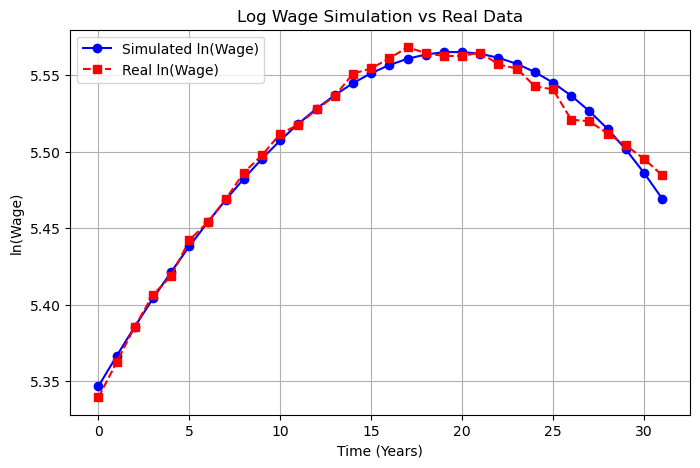

In [69]:
def simulate(params, wages, hours):
    k0, beta1, beta2, delta = params
    ln_wage = np.zeros(len(wages))
    for t in range(len(wages)):
        ln_wage[t] = (
            beta1 * (1 - delta) ** t * k0
            + beta1 * sum_hours(t, k0, hours, delta)
            + beta2 * t**2
        )

    return ln_wage



ln_wage = simulate(estimated_params, wages, hours)


import matplotlib.pyplot as plt

def plot_ln_wage(ln_wage, man_hourly_salary, title="Log Wage Simulation vs Real Data", 
                 xlabel="Time (Years)", ylabel="ln(Wage)"):
    plt.figure(figsize=(8, 5))
    
    # Convert real hourly salary to log scale for comparison
    ln_real_wage = np.log(man_hourly_salary)
    
    # Plot simulated ln_wage
    plt.plot(ln_wage, marker="o", linestyle="-", label="Simulated ln(Wage)", color='b')
    
    # Plot real ln(wage)
    plt.plot(ln_real_wage, marker="s", linestyle="--", label="Real ln(Wage)", color='r')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_ln_wage(ln_wage, wages)

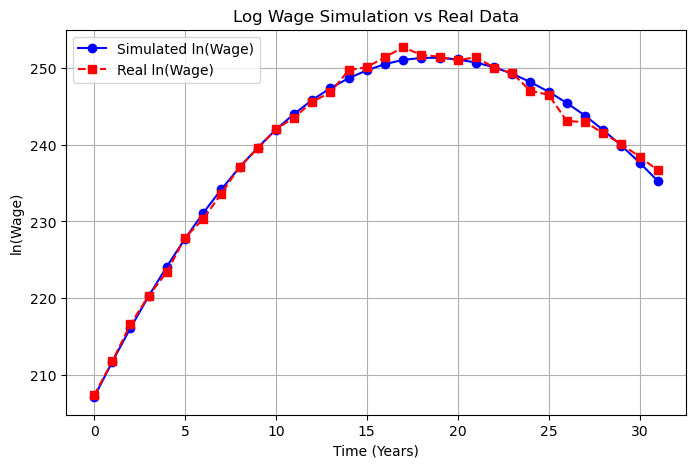

In [9]:
plot_ln_wage(np.exp(ln_wage), np.exp(wages))